# Final Project

## Introduction

Cheese, the delicious creation from combining dairy and fermentation, is often a favoured delicacy or recipe-must-have for many people. However, for those who are more health-conscious or on a dietary/caloric restriction, it may be beneficial to obtain the fat level of the chosen cheese before purchasing/cooking with it. Therefore, as a cheese-lover and someone who is trying to lose weight and become healthier, I hope to answer the question: 

**Would it be possible to train a machine learning model to predict the fat level, as "high" or "low," in cheese? And if so, which model would work best as measured by mulitple scoring metrics, including "accuracy," "recall," "precision," and "f1 score"?**

This project aims to answer the afore-mentioned questions by testing different machine learning models, such as **DummyClassifier** and **KNeighborsClassifier**, wtih additional scoring metrics beside "accuracy", like **recall**, **precision**, and **f1 score**. Given that the provided "cheese_data" data set categorizes fat level as "high level" and "low level," the goal of this project will be better achieved with classification models rather than regression, as the end result should display either of the two labels. Much like other real world data sets, the "cheese" data set may include possible class imbalance issue, which if so, we will discuss how to address this problem later on in the process. 

My expected project outcome would be a **RandomizedSearchCV** model built with a **RandomForestClassifier** pipeline and additional parameters to ensure better overall scoring accuracy; additional measurement, such as a confusion matrix and classification report will be created to ascertain if my expectation is indeed correct or false.

First, let's import all necessary functions and models:

In [1]:
import pandas as pd
import altair as alt
import scipy
import numpy as np

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import (
    FunctionTransformer,
    Normalizer,
    OneHotEncoder,
    StandardScaler,
    normalize,
    scale)
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.svm import SVC, SVR

Next up, let's read in the data we will be analyzing with, the cheese_data.csv, and name it as "cheese." 

In [2]:
cheese = pd.read_csv("data/cheese_data.csv")

Let's take a look at it before discussing some of the features and what we can do with it!

In [3]:
cheese

,CheeseId,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel
0,228,NB,Farmstead,47.0,"Sharp, lactic",Uncooked,0,Firm Cheese,Ewe,Raw Milk,Washed Rind,Sieur de Duplessis (Le),lower fat
1,242,NB,Farmstead,47.9,"Sharp, lactic, lightly caramelized",Uncooked,0,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Tomme Le Champ Doré,lower fat
2,301,ON,Industrial,54.0,"Mild, tangy, and fruity","Pressed and cooked cheese, pasta filata, inter...",0,Firm Cheese,Cow,Pasteurized,NaN,Provolone Sette Fette (Tre-Stelle),lower fat
3,303,NB,Farmstead,47.0,Sharp with fruity notes and a hint of wild honey,NaN,0,Veined Cheeses,Cow,Raw Milk,NaN,Geai Bleu (Le),lower fat
4,319,NB,Farmstead,49.4,Softer taste,NaN,1,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Gamin (Le),lower fat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,2387,NS,Farmstead,37.0,"Dill, Caraway, Chili Pepper, Cumin, Sage, Chiv...",Fresh curds through a variety of added Organic...,1,Hard Cheese,Cow,Pasteurized,NaN,Knoydart,higher fat
1038,2388,AB,Industrial,46.0,Mild and Deep Flavor,Low in Sodium and Fat,0,Fresh Cheese,Cow,Pasteurized,NaN,FRESK-O,lower fat
1039,2389,NS,Artisan,40.0,Grassy tang and restrained saltiness that refl...,NaN,0,Veined Cheeses,Ewe,Thermised,NaN,Electric Blue,higher fat
1040,2390,NS,Artisan,34.0,Sweet and tangy flavours combine with hoppy no...,NaN,0,Semi-soft Cheese,Ewe,Thermised,Washed Rind,Hip Hop,higher fat


Looking at the "cheese" data set, we can see that some columns include "NaN" values. They can be problematic and difficult to deal with, so let's find out which column(s) include it. 

In [4]:
cheese.isnull().sum()

CheeseId                  0
ManufacturerProvCode      0
ManufacturingTypeEn       0
MoisturePercent          14
FlavourEn               241
CharacteristicsEn       399
Organic                   0
CategoryTypeEn           23
MilkTypeEn                1
MilkTreatmentTypeEn      65
RindTypeEn              321
CheeseName                0
FatLevel                  0
dtype: int64

As illustrated by the result, quite a few columns include null values, which will be addressed in the preprocessing stage of this project. However, some columns can first be dropped and excluded as they either do not contribute to training a model/pipeline, such as "CheeseName" and "CheeseId," or overcomplicate the process too much, such as "FlavourEn," "CharacteristicsEn," and "RindTypeEn;" the following code will implement the feature exclusion. 

In [5]:
cheese = cheese.drop(columns=['CheeseId', 'CheeseName', 'FlavourEn', 'CharacteristicsEn', 'RindTypeEn'])
cheese

,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,FatLevel
0,NB,Farmstead,47.0,0,Firm Cheese,Ewe,Raw Milk,lower fat
1,NB,Farmstead,47.9,0,Semi-soft Cheese,Cow,Raw Milk,lower fat
2,ON,Industrial,54.0,0,Firm Cheese,Cow,Pasteurized,lower fat
3,NB,Farmstead,47.0,0,Veined Cheeses,Cow,Raw Milk,lower fat
4,NB,Farmstead,49.4,1,Semi-soft Cheese,Cow,Raw Milk,lower fat
...,...,...,...,...,...,...,...,...
1037,NS,Farmstead,37.0,1,Hard Cheese,Cow,Pasteurized,higher fat
1038,AB,Industrial,46.0,0,Fresh Cheese,Cow,Pasteurized,lower fat
1039,NS,Artisan,40.0,0,Veined Cheeses,Ewe,Thermised,higher fat
1040,NS,Artisan,34.0,0,Semi-soft Cheese,Ewe,Thermised,higher fat


With the unnecessary columns now dropped, we can confidently determine that the remaining columns, except for "FatLevel" as it is our target column instead, will serve as our "X" columns to help us build and train the desired classification model. 

But first, let's look more closely at the data at hand with some visualizations! 

## Exploratory Data Analysis

Let's first look at our targeted "y" column, Fat Level, and if, or how, skewed it is in a bar chart!

In [6]:
# use groupby and count function to tally up how many cheese are categorized as "higher fat" and "lower fat"
cheese_groupby_fatlevel = cheese.groupby(by='FatLevel').count().reset_index()
cheese_groupby_fatlevel

# the plot function itself with "Fat Level" as X, and "CheeseName" as Y
cheese_fatlevel_barchart = alt.Chart(cheese_groupby_fatlevel).mark_bar().encode(alt.X('FatLevel:N', title='Fat Level'),
                                                                                alt.Y('ManufacturingTypeEn:Q', title='Cheese Count')
                                                                                ).properties(title='Cheese Count for Fat Levels')
cheese_fatlevel_barchart

alt.Chart(...)

As illustrated by the "Cheese Count for Fat Levels," we can see that "lower fat" almost doubles "higher fat" in terms of quantity, which showcases a skewed distribution towards the former category. A balanced-class-weight parameter may help the pipeline to resolve this issue, although at the expense of more false positives.

Let's now put aside the "y" column for a minute and focus on the distribution of the "X" columns. Below are a few more bar charts that showcase how many cheese are labeled in their respective categories:

In [7]:
# use groupby and count function to tally up how many cheese are categorized in each distinct value
cheese_groupby_prov = cheese.groupby(by='ManufacturerProvCode').count().reset_index()
cheese_groupby_prov

# the plot function itself with "Fat Level" as X, and "CheeseName" as Y
cheese_prov_barchart = alt.Chart(cheese_groupby_prov).mark_bar().encode(alt.X('ManufacturerProvCode:N', title='Manufacturer Province Code'),
                                                                                alt.Y('ManufacturingTypeEn:Q', title='Cheese Count')
                                                                                ).properties(title='Cheese Count for Manufacturing Province')
cheese_prov_barchart

alt.Chart(...)

The distribution for "Manufacturing Province Code" is heavily skewed as QC, likely the porvince code for Quebec, dominates the data set, with Ontario's ON and British Columbia's BC taking second and third place repsectively. This may become a problem and result in class imbalance, as QC outnumbers other entries way too much. If QC is defined as positive, then we may have issues with false negative labels as the pipeline may skew towards that label for its prediction; therefore, it may be useful to add a balanced-class-weight parameter to ensure that each class is treated equally. 

Let's move on to "Manufacturing Type" next! 

In [8]:
# use groupby and count function to tally up how many cheese are categorized in each distinct value
cheese_groupby_manutype = cheese.groupby(by='ManufacturingTypeEn').count().reset_index()
cheese_groupby_manutype

# the plot function itself with "Fat Level" as X, and "CheeseName" as Y
cheese_manutype_barchart = alt.Chart(cheese_groupby_manutype).mark_bar().encode(alt.X('ManufacturingTypeEn:N', title='Manufacturing Type'),
                                                                                alt.Y('ManufacturerProvCode', title='Cheese Count')
                                                                                ).properties(title='Cheese Count for Manufacturing Type')
cheese_manutype_barchart

alt.Chart(...)

The "Cheese Count for Manufacturing Type" bar chart also shows a slightly skewed distribution, albeit less than the previous two visualizations in comparison. This chart showcases a "M" like distribution, with "Farmstead" category being the lesser of the three categories; this issue, however, may not be indicative to class imbalance, as the cheese manufacturing process may just realistically include less of the "Farmstead" manufacturing type. Unlike the previous two comparisons, this one warrants less caution as the difference between the three categories are less extreme.

In [9]:
# use groupby and count function to tally up how many cheese are categorized in each distinct value
cheese_groupby_moist = cheese.groupby(by='MoisturePercent').count().reset_index()
cheese_groupby_moist

# the plot function itself with "Fat Level" as X, and "CheeseName" as Y
cheese_moist_barchart = alt.Chart(cheese_groupby_moist).mark_circle().encode(alt.X('MoisturePercent:Q', title='Moisture Percentage'),
                                                                                alt.Y('ManufacturingTypeEn:Q', title='Cheese Count')
                                                                                ).properties(title='Cheese Count for Moist Percentage')
cheese_moist_barchart

alt.Chart(...)

The visualization indicates that the moisture percentage seems to feature a centralized distribution, with the majority of cheese being within the 30% to 70% range and a few potential outliers, such as the ones near 160 and 100 cheese counts. This distribution seems to be the most normal/standard by far. 

In [10]:
# use groupby and count function to tally up how many cheese are categorized in each distinct value
cheese_groupby_organic = cheese.groupby(by='Organic').count().reset_index()
cheese_groupby_organic

# the plot function itself with "Fat Level" as X, and "CheeseName" as Y
cheese_organic_barchart = alt.Chart(cheese_groupby_organic).mark_bar().encode(alt.X('Organic:N', title='Organic'),
                                                                                alt.Y('ManufacturingTypeEn:Q', title='Cheese Count')
                                                                                ).properties(title='Cheese Count for Organic')
cheese_organic_barchart

alt.Chart(...)

The "Cheese Count for Organic" shows a heavily skewed distribution towards "0," which is the **inorganic** category, and, despite the realistic nature of the data itself, such an over-abundance of examples can potentially create class imbalance within our models; therefore, a balanced-class-weight might be helpful in resolving this potential problem during our training phase of the models. 

In [11]:
# use groupby and count function to tally up how many cheese are categorized in each distinct value
cheese_groupby_category = cheese.groupby(by='CategoryTypeEn').count().reset_index()
cheese_groupby_category

# the plot function itself with "Fat Level" as X, and "CheeseName" as Y
cheese_category_barchart = alt.Chart(cheese_groupby_category).mark_bar().encode(alt.X('CategoryTypeEn:N', title='Category Type'),
                                                                                alt.Y('ManufacturingTypeEn:Q', title='Cheese Count')
                                                                                ).properties(title='Cheese Count for Category Type')
cheese_category_barchart

alt.Chart(...)

This visualization shows that "Firm Cheese" is the most common cheese type, with "Soft Cheese" and "Semi-soft Cheese" taking the second and third place respectively. Although the data set itself is very likely a realistic reflection of the amount of cheese categories made through the manufacturing process, the concern of class imbalance still persists. A balanced-class-weight will likely be needed to offset the drastic difference between categories such as "Firm Cheese" and "Hard Cheese" as the prediction from models and pipelines later on may otherwise be favouring the former too much. 

In [12]:
# use groupby and count function to tally up how many cheese are categorized in each distinct value
cheese_groupby_milktype = cheese.groupby(by='MilkTypeEn').count().reset_index()
cheese_groupby_milktype

# the plot function itself with "Fat Level" as X, and "CheeseName" as Y
cheese_milktype_barchart = alt.Chart(cheese_groupby_milktype).mark_bar().encode(alt.X('MilkTypeEn:N', title='Milk Type'),
                                                                                alt.Y('ManufacturingTypeEn:Q', title='Cheese Count')
                                                                                ).properties(title='Cheese Count for Milk Type')
cheese_milktype_barchart

alt.Chart(...)

This visualization also shares the similar issue, which is possible class imbalance due to two columns, namely "Cow" and "Goat," outnumbering the rest by a hefty amount; a balanced-class-weight parameter should be introduced to the models later to prevent class imbalance from happening. 

In [13]:
# use groupby and count function to tally up how many cheese are categorized in each distinct value
cheese_groupby_milktreat = cheese.groupby(by='MilkTreatmentTypeEn').count().reset_index()
cheese_groupby_milktreat

# the plot function itself with "Fat Level" as X, and "CheeseName" as Y
cheese_milktreat_barchart = alt.Chart(cheese_groupby_milktreat).mark_bar().encode(alt.X('MilkTreatmentTypeEn:N', title='Milk Treatment Type'),
                                                                                alt.Y('ManufacturingTypeEn:Q', title='Cheese Count')
                                                                                ).properties(title='Cheese Count for Milk Treatment Type')
cheese_milktreat_barchart

alt.Chart(...)

Much like many of the other visualizations, "Cheese Count for Milk Treatment Type" also features the same potential class imbalance problem; a balanced-class-weight parameter is recommended.

As many of the summaries of different visualizations have mentioned, there is a potential class imbalance issue with the "cheese" data set, and a balanced-class-weight counter-measure will likely help with easing the imbalance, although at the expense of more false positive predictions. As with many other data sets and analyses that suffer from class imbalance issues, the overall accuracy score may not be the most effective metric to weigh the efficiency of models. Instead, we should use metrics such as **recall**, **precision**, and **f1 scores** to better assess the potential models; these metrics focus on the different positives, and the harmonic mean of precision combined with recall, without putting the sole focus on overall accuracy regardless of the proportions of examples outnumbering others. 

## Preprocessing

Before we do anything to the "cheese" data set, let's first change the y column, "FatLevel," into binary columns so that **"higher fat" = 1** and **"lower fat" = 0**; such a change will allow the models to more easily generate the scoring metrics we need to properly assess them.

In [14]:
cheese_fatlevelchange = cheese.replace(['higher fat', 'lower fat'], [1, 0])
cheese_fatlevelchange

,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,FatLevel
0,NB,Farmstead,47.0,0,Firm Cheese,Ewe,Raw Milk,0
1,NB,Farmstead,47.9,0,Semi-soft Cheese,Cow,Raw Milk,0
2,ON,Industrial,54.0,0,Firm Cheese,Cow,Pasteurized,0
3,NB,Farmstead,47.0,0,Veined Cheeses,Cow,Raw Milk,0
4,NB,Farmstead,49.4,1,Semi-soft Cheese,Cow,Raw Milk,0
...,...,...,...,...,...,...,...,...
1037,NS,Farmstead,37.0,1,Hard Cheese,Cow,Pasteurized,1
1038,AB,Industrial,46.0,0,Fresh Cheese,Cow,Pasteurized,0
1039,NS,Artisan,40.0,0,Veined Cheeses,Ewe,Thermised,1
1040,NS,Artisan,34.0,0,Semi-soft Cheese,Ewe,Thermised,1


Let's then split it into training set and testing set. We will opt for two parameters, **test_size=0.2** (that ensures the testing data set being 20% of the original data set) and **random_state=123** (that random shuffles the data set based on the amount of times given), as a simplified approach  for the splitting process. 

In [15]:
train_df, test_df = train_test_split(cheese_fatlevelchange, test_size=0.2, random_state=123)

In [16]:
train_df.describe

<bound method NDFrame.describe of      ManufacturerProvCode ManufacturingTypeEn  MoisturePercent  Organic  \
482                    QC             Artisan             48.0        0   
896                    QC             Artisan             45.0        0   
421                    QC          Industrial             50.0        0   
929                    BC             Artisan             40.0        0   
737                    QC             Artisan             65.0        0   
...                   ...                 ...              ...      ...   
638                    QC             Artisan             44.0        0   
113                    ON          Industrial             52.0        0   
96                     ON          Industrial             74.0        0   
106                    ON          Industrial             40.0        0   
1041                   AB             Artisan             31.5        0   

        CategoryTypeEn MilkTypeEn MilkTreatmentTypeEn  FatLevel  

In [17]:
test_df.describe

<bound method NDFrame.describe of     ManufacturerProvCode ManufacturingTypeEn  MoisturePercent  Organic  \
318                   QC          Industrial             42.0        0   
235                   QC             Artisan             50.0        0   
449                   QC             Artisan             52.0        0   
739                   QC          Industrial             52.0        1   
621                   QC           Farmstead             45.0        0   
..                   ...                 ...              ...      ...   
36                    ON             Artisan             47.0        0   
162                   QC             Artisan             34.0        0   
260                   QC          Industrial             55.0        0   
808                   QC             Artisan             57.0        0   
363                   QC          Industrial             51.0        0   

       CategoryTypeEn    MilkTypeEn MilkTreatmentTypeEn  FatLevel  
318      

With the data now split, let's call back the **isnull().sum()** function to see how many null values, and in which columns, we are dealing with.

In [18]:
train_df.isnull().sum()

ManufacturerProvCode     0
ManufacturingTypeEn      0
MoisturePercent         12
Organic                  0
CategoryTypeEn          20
MilkTypeEn               1
MilkTreatmentTypeEn     52
FatLevel                 0
dtype: int64

In [19]:
test_df.isnull().sum()

ManufacturerProvCode     0
ManufacturingTypeEn      0
MoisturePercent          2
Organic                  0
CategoryTypeEn           3
MilkTypeEn               0
MilkTreatmentTypeEn     13
FatLevel                 0
dtype: int64

Although the null values are definitely a problem, but it is a problem that I plan to fix later on when we are creating the column transformers!

Let's split the train and test dataframes into our desired X and y data sets!

In [20]:
X_train = train_df.drop(columns=['FatLevel'])
y_train = train_df['FatLevel']
X_test = test_df.drop(columns=['FatLevel'])
y_test = test_df['FatLevel']

With X and y train and test sets now created, we can move onto categorizing features into different types and creating the required column transformers. As mentioned previously, there are some null values in both train and test sets, and I plan to use imputation to fill them in with **median** values for the numeric column and **most frequent** values for the categorical columns. Other appropriate parameters will also be applied to help streamline the column transforming process.

In [21]:
numeric_features = ['MoisturePercent']

categorical_features = ['ManufacturerProvCode',
                       'ManufacturingTypeEn', 
                       'CategoryTypeEn', 
                       'MilkTypeEn', 
                       'MilkTreatmentTypeEn']

binary_features = ['Organic']

numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), 
           ("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent", fill_value="missing")),
           ("onehot", OneHotEncoder(handle_unknown="ignore"))]
)

preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features),
    (OneHotEncoder(handle_unknown="error", drop="if_binary"), binary_features)
)

## Methods and Results

With preprocessing finished, we are moving onto training and testing different models to assess which one works the best. First, let's start off with a **DummyClassifier** and **strategy='stratified'** (to improve the predictive accuracy and control over-fitting). Once the pipeline is created, we will perform a **5-fold cross validation** right away!

In [22]:
dummy_model = DummyClassifier(strategy='stratified')

dummy_valid = pd.DataFrame(cross_validate(dummy_model, X_train, y_train, cv=5, return_train_score=True,
                                         scoring = ['accuracy', 'recall', 'precision', 'f1']))

dummy_valid

,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall,test_precision,train_precision,test_f1,train_f1
0,0.001707,0.006407,0.556886,0.530030,0.403509,0.350877,0.365079,0.326531,0.383333,0.338266
1,0.001441,0.004165,0.568862,0.534535,0.368421,0.333333,0.368421,0.324786,0.368421,0.329004
2,0.001191,0.004102,0.544910,0.537538,0.298246,0.350877,0.320755,0.333333,0.309091,0.341880
3,0.001206,0.004116,0.590361,0.592204,0.368421,0.425439,0.396226,0.407563,0.381818,0.416309
4,0.001178,0.004123,0.584337,0.556222,0.333333,0.385965,0.380000,0.360656,0.355140,0.372881


Although not quite precise, we can see through the results that the overall train and test scores are low, which means the DummyClassifier is **underfitting**; this is good news, since we now know for certain that DummyClassifier is not a good model for what we wish to achieve.

As a quick disclaimer, we will NOT be including DecisionTreeClassifier within our models of considerations, as it is NOT capable of handling string values within the data set; therefore, making it automatically a bad fit for our "cheese" data set.

Let's move onto a different classifier, **RandomForestClassifier**, and assess how it fares against DummyClassifier! 

In [23]:
# a random_state=77 has been included to shuffle up the data more for a more objective result
rf_unbalanced_pipe = make_pipeline(preprocessor, RandomForestClassifier(random_state=77))

rf_unbalanced_scores = pd.DataFrame(cross_validate(rf_unbalanced_pipe, X_train, y_train, cv=5, return_train_score=True,
                                                  scoring = ['accuracy', 'precision', 'recall', 'f1']))

rf_unbalanced_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.280262,0.033451,0.820359,0.951952,0.721311,0.926087,0.771930,0.934211,0.745763,0.930131
1,0.273891,0.028889,0.814371,0.951952,0.709677,0.915254,0.771930,0.947368,0.739496,0.931034
2,0.272145,0.028945,0.820359,0.947447,0.736842,0.925110,0.736842,0.921053,0.736842,0.923077
3,0.278468,0.029185,0.849398,0.943028,0.785714,0.895833,0.771930,0.942982,0.778761,0.918803
4,0.275663,0.029027,0.831325,0.946027,0.754386,0.913793,0.754386,0.929825,0.754386,0.921739


Although the overall train and test scores are looking much better compared to DummyClassifier, the problem of class imbalance still remains; to resolve this issue, let's redo this model and fit it with **class_weight="balanced"** this time instead!

In [24]:
# a random_state=77 has been included to shuffle up the data more for a more oBjective result
rf_balanced_pipe = make_pipeline(preprocessor, RandomForestClassifier(class_weight='balanced', random_state=77))

rf_balanced_scores = pd.DataFrame(cross_validate(rf_balanced_pipe, X_train, y_train, cv=5, return_train_score=True,
                                                  scoring = ['accuracy', 'precision', 'recall', 'f1']))

rf_balanced_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.280107,0.028907,0.808383,0.951952,0.692308,0.908333,0.789474,0.956140,0.737705,0.931624
1,0.277491,0.028643,0.820359,0.951952,0.714286,0.904959,0.789474,0.960526,0.750000,0.931915
2,0.273769,0.028909,0.832335,0.947447,0.745763,0.907173,0.771930,0.942982,0.758621,0.924731
3,0.282783,0.028919,0.849398,0.943028,0.785714,0.883065,0.771930,0.960526,0.778761,0.920168
4,0.279410,0.029077,0.795181,0.946027,0.682540,0.896694,0.754386,0.951754,0.716667,0.923404


Let's get the two models' mean score of each columns as well, for a better comparison!

In [25]:
rf_unbalanced_mean = rf_unbalanced_scores.mean()
rf_unbalanced_mean

fit_time           0.276086
score_time         0.029900
test_accuracy      0.827163
train_accuracy     0.948081
test_precision     0.741586
train_precision    0.915216
test_recall        0.761404
train_recall       0.935088
test_f1            0.751050
train_f1           0.924957
dtype: float64

In [26]:
rf_balanced_mean = rf_balanced_scores.mean()
rf_balanced_mean

fit_time           0.278712
score_time         0.028891
test_accuracy      0.821131
train_accuracy     0.948081
test_precision     0.724122
train_precision    0.900045
test_recall        0.775439
train_recall       0.954386
test_f1            0.748351
train_f1           0.926368
dtype: float64

With the balanced model, the mean test_precision has decreased from 0.741586 to 0.724122 and a dip of mean train_precision for 0.015. However, the mean train_recall has increased in contrast, which then leads to a similar mean f1 score. Perhaps my assumption from the beginning of **class imbalance having a huge impact on the data set is incorrect, as the difference between balanced and unbalanced models is quite minimal!** Nevertheless, more models need to be tested before we can reach a conclusion on that. 

Let's try **KNeighborsClassifier** this time and see how well (or terribly) this model functions!

In [27]:
# we will set a n_neighbors=5 as a general parameter
knn_unbalanced_pipe = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=5))

knn_unbalanced_valid = pd.DataFrame(cross_validate(knn_unbalanced_pipe, X_train, y_train, cv=5, return_train_score=True, 
                                                  scoring = ['accuracy', 'precision', 'recall', 'f1']))

knn_unbalanced_valid

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.019639,0.026144,0.814371,0.860360,0.709677,0.797357,0.771930,0.793860,0.739496,0.795604
1,0.018539,0.024876,0.820359,0.866366,0.728814,0.800866,0.754386,0.811404,0.741379,0.806100
2,0.018519,0.025834,0.790419,0.869369,0.703704,0.837321,0.666667,0.767544,0.684685,0.800915
3,0.018501,0.025577,0.795181,0.863568,0.725490,0.840796,0.649123,0.741228,0.685185,0.787879
4,0.018439,0.024244,0.831325,0.857571,0.763636,0.795556,0.736842,0.785088,0.750000,0.790287


The model seems to be **underfitting** as the overall train and test scores seem to be quite low, but hopefully with a more balanced approach, the results can look better.

In [28]:
knn_balanced_pipe = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=5))

knn_balanced_valid = pd.DataFrame(cross_validate(knn_balanced_pipe, X_train, y_train, cv=5, return_train_score=True, 
                                                  scoring = ['balanced_accuracy', 'precision', 'recall', 'f1']))

knn_balanced_valid

,fit_time,score_time,test_balanced_accuracy,train_balanced_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.019052,0.026064,0.804147,0.844418,0.709677,0.797357,0.771930,0.793860,0.739496,0.795604
1,0.019055,0.025884,0.804466,0.853190,0.728814,0.800866,0.754386,0.811404,0.741379,0.806100
2,0.018804,0.026196,0.760606,0.844959,0.703704,0.837321,0.666667,0.767544,0.684685,0.800915
3,0.018469,0.025848,0.760341,0.834168,0.725490,0.840796,0.649123,0.741228,0.685185,0.787879
4,0.018586,0.025702,0.808788,0.840152,0.763636,0.795556,0.736842,0.785088,0.750000,0.790287


Interestingly, the balanced train and test scores seem to drop even further as other scores stay the same. This is certainly not a better model than RandomForestClassifier. 

Despite the similarities between the two models, let's try **SVM** this time with **gamma=1** (that determines the radius of sample inclusion, the higher the value, the more complex the model becomes) and **C=1** (that controls the margin of training point classification, the higher the value, the more complex the model becomes) to help tackle the underfitting problem that KNeighborClassifier has.

In [29]:
svm_pipe = make_pipeline(preprocessor, SVC(gamma=1, C=1))

svm_valid = pd.DataFrame(cross_validate(svm_pipe, X_train, y_train, cv=5, return_train_score=True,
                                       scoring = ['accuracy', 'recall', 'precision', 'f1']))

svm_valid

,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall,test_precision,train_precision,test_f1,train_f1
0,0.039833,0.017383,0.778443,0.870871,0.649123,0.811404,0.685185,0.811404,0.666667,0.811404
1,0.038057,0.017359,0.790419,0.872372,0.666667,0.820175,0.703704,0.809524,0.684685,0.814815
2,0.038140,0.017246,0.772455,0.876877,0.666667,0.820175,0.666667,0.820175,0.666667,0.820175
3,0.038473,0.017622,0.783133,0.871064,0.596491,0.824561,0.723404,0.803419,0.653846,0.813853
4,0.038070,0.017486,0.771084,0.854573,0.473684,0.785088,0.771429,0.788546,0.586957,0.786813


In [30]:
svm_mean = svm_valid.mean()
svm_mean

fit_time           0.038514
score_time         0.017419
test_accuracy      0.779107
train_accuracy     0.869151
test_recall        0.610526
train_recall       0.812281
test_precision     0.710078
train_precision    0.806614
test_f1            0.651764
train_f1           0.809412
dtype: float64

SVM, similar to KNeighborClassifier, does not seem to be better than RandomForestClassifier, but the fundamental difference between the two models is still worth pointing out.

SVM focuses on two-class datasets, measures the distance between each data entries, and works best when there are only two numeric features involved, whereas RandomForestClassifier tackles multi-class problems and works well with a mixture of numeric and categorical features. The inclusion of both KNeighborClassifier and SVM is to a) experiment with different models that may not be conventionally associated to a multi-class data set, and b) consider, even if the overall score is better (which is not the case in this project), the nature of the data set and the models themselves first-and-foremost. 

Let's call back the balanced RandomForestClassifier score again and compute the mean values of each column!

In [31]:
rf_balanced_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.280107,0.028907,0.808383,0.951952,0.692308,0.908333,0.789474,0.956140,0.737705,0.931624
1,0.277491,0.028643,0.820359,0.951952,0.714286,0.904959,0.789474,0.960526,0.750000,0.931915
2,0.273769,0.028909,0.832335,0.947447,0.745763,0.907173,0.771930,0.942982,0.758621,0.924731
3,0.282783,0.028919,0.849398,0.943028,0.785714,0.883065,0.771930,0.960526,0.778761,0.920168
4,0.279410,0.029077,0.795181,0.946027,0.682540,0.896694,0.754386,0.951754,0.716667,0.923404


In [32]:
rf_balanced_mean

fit_time           0.278712
score_time         0.028891
test_accuracy      0.821131
train_accuracy     0.948081
test_precision     0.724122
train_precision    0.900045
test_recall        0.775439
train_recall       0.954386
test_f1            0.748351
train_f1           0.926368
dtype: float64

Looking at the mean results, we can see that **overfitting** is most likely a problem with this model, since the difference between each train and test score is quite noticable. Thankfully, there are parameters that can help reduce it, such as **max_depth** and **n_estimators**, but how are we going to find the best value to set for these parameters? 

That's where **RandomSearchCV** comes in; it randomly samples through the data set and tests different combinations to ascertain which is the best value for each parameter. Although GridSearchCV may give us the most pinpoint accurate result, the extensive time and hardware processing power (which unfortunately I do not possess as I am working off a laptop, not a well-built PC) are two huge disadvantages when compared to the efficiency and microscopically-less-accurate results that we can obtain from RandomSearchCV. 

We will be using **rf_balanced_pipe** as the base pipeline to build the RandomSearchCV, with additional hyperparameters, such as **n_iter=50**, **cv=5**, **verbose=1** and **n_jobs=-1**, which will help streamline the code and obtain the results with enough complexity without bogging down the system. The parameters dictionary will include limits for both "max_depth" and "n_estimator" to ensure that we don't force the software and hardware to run the codes too many times, which may lead to unwanted errors and crashes.

In [33]:
# do the RandomSearchCV
# look at Assignment 7 - Section 2 for more information

param_dist = {
    "randomforestclassifier__n_estimators": scipy.stats.randint(low=10, high=300),
    "randomforestclassifier__max_depth": scipy.stats.randint(low=2, high=20),
}

scorer = ['f1']

random_search = RandomizedSearchCV(
    rf_balanced_pipe,
    param_dist,
    n_iter=50,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=123,
)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['MoisturePercent']),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('imputer',
                                                     

Let's use **best_params_** to find the best hyperparameters!

In [34]:
# use best_param_ to get best parameters
best_params = random_search.best_params_
best_params

{'randomforestclassifier__max_depth': 8,
 'randomforestclassifier__n_estimators': 126}

As shown by the result, the best hyperparameters for random_search is **max_depth=8** and **n_estimators=126**.

Let's now move onto finding the best score with the **best_score_** function!

In [35]:
# use best_score_ to get best scores
best_scores = random_search.best_score_
best_scores.round(4)

0.8368

As indicated by the result, the mean cross-validated score from the random-search model is **0.8368**; this cross-validation seems promising, as it is neither too high (which can lead to "overfitting") nor too low (which can lead to "underfitting"). Let's get the scores from the train and test sets as well.

In [36]:
train_score = random_search.score(X_train, y_train)
train_score

0.8931572629051621

In [37]:
test_score = random_search.score(X_test, y_test)
test_score

0.8373205741626795

There is now a smaller difference between the two scores, which showcases the model's ability to **neither overfit nor underfit**. However, our job is not yet finished, as we should still plot a confusion matrix to look at all the true and false positives and negatives that can be derived from the model's predictions! 

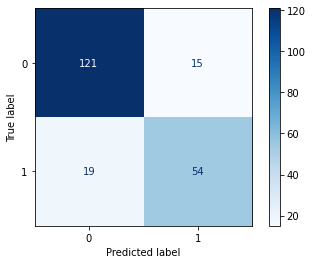

In [38]:
# create a confusion matrix plot
cm_plot = plot_confusion_matrix(random_search, X_test, y_test, cmap='Blues')
cm_plot

The plot tells us that there are: **121 True Negatives**, **19 False Negatives**, **54 True Positives**, and **15 False Positvies**.

Let's print out a classification report and examine the different metrics that utilize all of what the confusion matrix tells.

In [39]:
# print a classification report
random_search_predicted = random_search.predict(X_test)
print(classification_report(y_test, random_search_predicted))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       136
           1       0.78      0.74      0.76        73

    accuracy                           0.84       209
   macro avg       0.82      0.81      0.82       209
weighted avg       0.84      0.84      0.84       209



The precision, recall and f1 scores for "lower fat level" seems to be higher than "higher fat level," but such a result may be more so indicative to the fact that the former category almost doubles the latter; therefore, **the "random_search" model will likely work better at predicting "lower fat level" correctly than "higher fat level."** Looking at the "weighted avg" category, we can also see that, when adjusted for a balanced class weight, **the "random_search" model does not seem to overfit or underfit**, as **precision, recall and f1 scores are the same, 0.84.**

Despite the lower likelihood of successfully predicting "higher fat level," **"random_search" is the best model to predict fat level in cheese as it does not have the same overfitting or underfitting issues that other models have.**

Lastly, I intend to do a simple test to see how well the predictions of the model, based on being fitted with "X_test," stack up against the actual fat levels in "y_test." We will first call back the predict function and turn it into a dataframe.

In [40]:
random_predict = pd.DataFrame(random_search.predict(X_test))
random_predict

,0
0,0
1,0
2,0
3,0
4,0
...,...
204,0
205,1
206,0
207,0


Next up, we will **turn "y_test" into a dataframe as well**.

In [41]:
y_test_df = pd.DataFrame(y_test)
y_test_df

,FatLevel
318,0
235,1
449,1
739,0
621,0
...,...
36,1
162,1
260,0
808,0


Finally, we will create a "columns_dist" that features both the predictions and the actual values of fat level, which will then be converted into a dataframe. We will apply a sum function to it in the end so we can see just how many predictions are correct!

In [42]:
columns_dist = {"y_test": y_test_df['FatLevel'], 
              "prediction": random_predict[0]}

results_df = pd.DataFrame(columns_dist)
results_df.sum()

y_test        73.0
prediction    69.0
dtype: float64

The results, which exclude any detailed account of false positives or false negatives, show that in general the model did quite well for its predictions; a **69/73 = 94.52% chance of getting it right!**

## Conclusions

The outcome of the project can be coined as somewhat satisfactory as we do have a model that can predict the fat level in cheese fairly well at a weighted average f1 score of 0.84, although the class imbalance issue, despite not severely hampering the effectiveness of the model, still persists. When working with real-world data sets, it is often difficult to fully eliminate the problem of class imbalance, at least not without changing the data gathering methods or process. 

The model, despite how well it performs given the circumstance, is still flawed, as descriptive columns were stripped from both the training and testing sets. "FlavourEn," "CharacteristicsEn," and "RindTypeEn" columns, and their content contained within, all likely included information that can increase the accuracy of the model; while I do not regret excluding them due to technical complexity, the outcome and scores could have become more satisfactory with them included. 

Although the project outcome is satisfactory enough, there are other additional methods or ideas that can further increase the overall scoring accuracy; one such an idea was to compare each entry from "y_test" to the corresponding prediction from the RandomizedSearchCV model, and assess if each individual prediction was correct or not. Without additional learning or programming training, I sadly was not able to include that idea in the porject itself, as the best I could do was to tally up a total count of prediction accuracy while omitting any possibility of false positive or false negative. 

Overall, the goal of the project has been achieved as there is now a model capable of making somewhat accurate predictions of fat level in cheese, albeit with certain information excluded from the process and some details omitted due to technical difficulty and concern for too much complexity in execution.

## References

While most information and the "cheese" data set has been provided by the course instructors/faculty members of UBC, additional insights and programming functions were gathered from other online websites.

**Resources used:**

- Data Source
    - This "Cheese data set used in this project was obtained from Kaggle and follows an Open Government License (Canada). 
- Information and Execution
    - All technical and programming concepts and skills I used in this project were taught by the UBC instructors and faculty members of the course: "Introduction to Machine Learning."
- Additional "RBF SVM Parameters" Information
    - https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
- Additional "Class Imbalance" Information
    - https://medium.com/mlearning-ai/handling-class-imbalance-in-machine-learning-cb1473e825ce 
- Additional "Random Forest" Information
    - https://www.geeksforgeeks.org/how-to-solve-overfitting-in-random-forest-in-python-sklearn/